# Ford GoBike System Data analysing
## by Salma Mohsen

## Preliminary Wrangling

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.[3] Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.
In June 2017 the system was officially re-launched as Ford GoBike

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
df2=df.dropna()

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [9]:
df2.duplicated().sum()

0

In [10]:
# Change start_time and end_time to datetime format
df2.start_time = pd.to_datetime(df2.start_time)
df2.end_time = pd.to_datetime(df2.end_time)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df2['start_time_weekday'] = df2['start_time'].dt.strftime('%a')

<ipython-input-11-71fb99dc6b36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_time_weekday'] = df2['start_time'].dt.strftime('%a')


In [12]:
df2['duration_min'] = df2['duration_sec']/60

<ipython-input-12-b65c1709b722>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['duration_min'] = df2['duration_sec']/60


In [13]:
df2['start_time_hour'] = df2.start_time.dt.strftime('%H')

<ipython-input-13-74f1697b8c90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_time_hour'] = df2.start_time.dt.strftime('%H')


In [14]:
df2['start_month'] = df2.start_time.dt.strftime('%B')

<ipython-input-14-a8e9b0b2538d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_month'] = df2.start_time.dt.strftime('%B')


In [15]:
# Calculate member_age from member_birth_year.
df2['member_age'] = 2021-df2['member_birth_year']

<ipython-input-15-358035f68172>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['member_age'] = 2021-df2['member_birth_year']


In [16]:
df2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,duration_min,start_time_hour,start_month,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thu,869.750000,17,February,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thu,1030.900000,12,February,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thu,608.166667,17,February,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thu,26.416667,23,February,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,Thu,29.883333,23,February,62.0


In [17]:
df2.to_csv('df2.csv', index=False)

### What is the structure of your dataset?

The original combined data contains approximately 180000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:


duration_sec	start_time	end_time	start_station_id	start_station_name	start_station_latitude	start_station_longitude	end_station_id	end_station_name	end_station_latitude	...	bike_id	user_type	member_birth_year	member_gender	bike_share_for_all_trip

Derived features/variables to assist exploration and analysis:
trip info: duration_minute, start_date, start_hourofday, start_dayofweek
member: member_age

all data are from 1 month only


### What is/are the main feature(s) of interest in your dataset?

> I am interested in investigate what influnces the number of rides and thier durations.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_time 

member_birth_year

durtion

user_type

## Univariate Exploration


In [18]:
def presentation(x,y,z,a,b) :
    graph = sb.catplot(data=df2, x=x, kind='count', color="blue", order = b, aspect = 1.7)
    graph.set_axis_labels(y, z)
    graph.fig.suptitle(a, y=1.05, fontsize=16, fontweight='bold');
    graph.set_xticklabels(rotation=75);

In [19]:
df2['start_month'].value_counts()

February    174952
Name: start_month, dtype: int64

all data are from one month

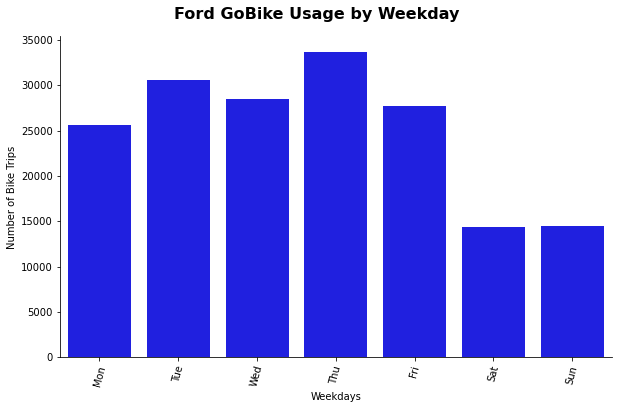

In [20]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
presentation('start_time_weekday','Weekdays','Number of Bike Trips', 'Ford GoBike Usage by Weekday', weekday)

Tuesdays and Wednesdays seem to be the most popular days ,while numbers drops significantly on Saturdays and Sundays 

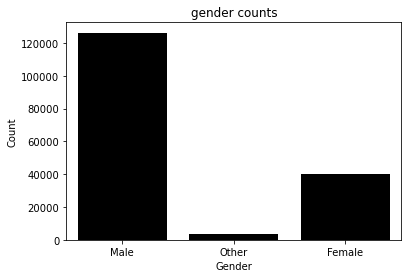

In [40]:
sb.countplot(data=df2, x='member_gender', color='black');
plt.title('gender counts')
plt.xlabel('Gender');
plt.ylabel('Count');


Male bikers are about 3 times of female bikers.

In [22]:
df2['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Text(0, 0.5, 'Number of Bike Trips')

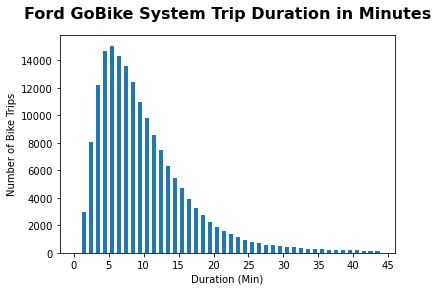

In [23]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
plt.hist(data = df2, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks)
plt.ylabel('Number of Bike Trips')

Text(0, 0.5, 'frequency')

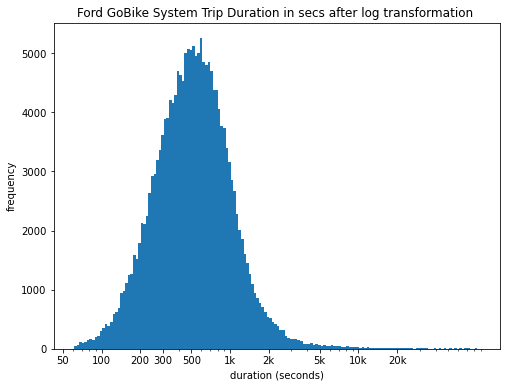

In [39]:
# log transformation 
plt.figure(figsize=[8,6])
bins= 10** np.arange(np.log10(df2.duration_sec.min()), np.log10(df2.duration_sec.max())+0.02, 0.02)
plt.hist(data=df, x='duration_sec',bins=bins)
plt.xscale('log')
plt.xticks([50,100,200,300,500, 1e3, 2e3, 5e3, 1e4, 2e4], [50,100,200,300,500, '1k', '2k', '5k', '10k', '20k'])
plt.title('Ford GoBike System Trip Duration in secs after log transformation ')
plt.xlabel('duration (seconds)')
plt.ylabel('frequency')

 The average trip is just under 10 minutes,most rides falls in 2 to 10 minutes 

Text(0.5, 1.0, 'age Box plot')

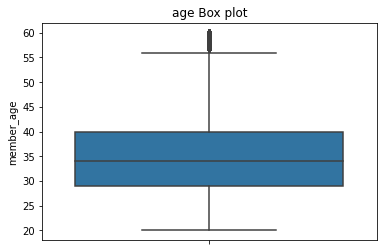

In [38]:
#looking for outlier
sb.boxplot(data = df2 , y = 'member_age')
plt.title('age Box plot')


outliers at 60


In [26]:
#remove outliers
df2 = df2[df2['member_age'] <= 60]

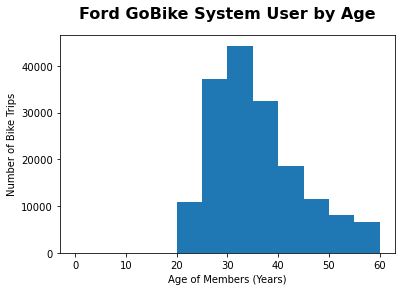

In [27]:
bin_edges = np.arange(0, 65, 5)
plt.hist(data = df2, x = 'member_age', bins = bin_edges);
plt.title("Ford GoBike System User by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

most bikers are around age 25 to 35

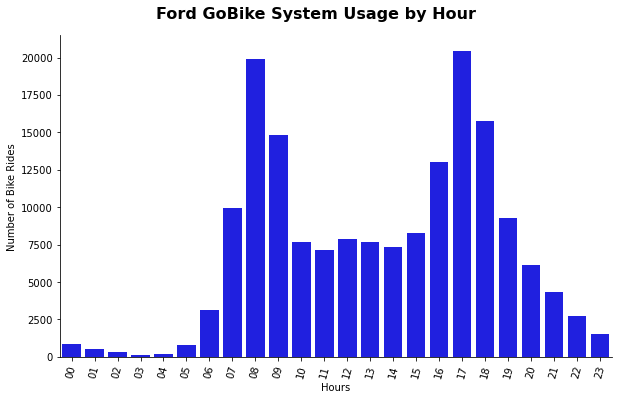

In [28]:
numbers=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
presentation('start_time_hour','Hours','Number of Bike Rides','Ford GoBike System Usage by Hour',numbers)

Most usage are during of 8-9am,and 17-18, which means they ued it commute to work

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 The number of trips peaked around 8-9am and 17-18pm during a day, there were more trips on work days compared to weekends. 
more male riders are more than female, and most members were subscribers compared to casual riders .most were around 25 to 40 years old.

Most rides were quick and short, lasted between 5 to 10 minutes, though there were some very long outliers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes.



## Bivariate Exploration


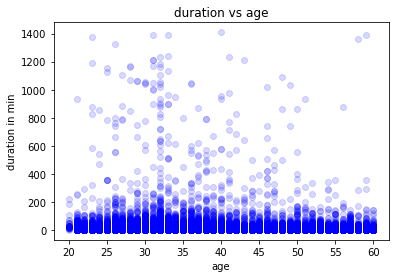

In [29]:
plt.scatter(df2.member_age, df2.duration_min, color = 'blue', alpha=0.15)
plt.title("duration vs age")
plt.xlabel("age")
plt.ylabel("duration in min")

plt.show()

no significance between age and duration

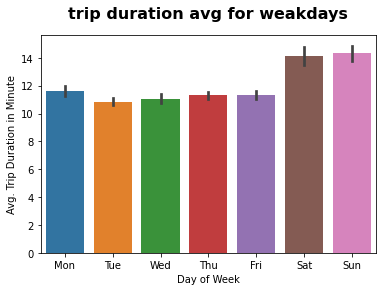

In [37]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.barplot(data=df2, x='start_time_weekday', y='duration_min', order = weekday);
plt.title('trip duration avg for weakdays', y=1.05, fontsize=16, fontweight='bold')

plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute');

trips are abit longer on weekends. It indicates efficient commute on normal work days.

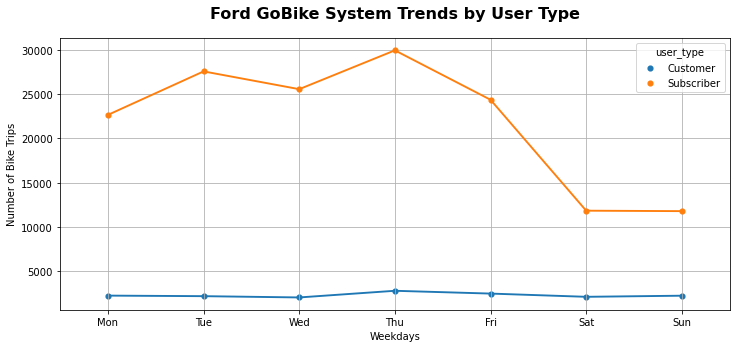

In [31]:
plt.figure(figsize=(12, 5))

df_user_week = df2.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

Customers have a relatively low usage with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

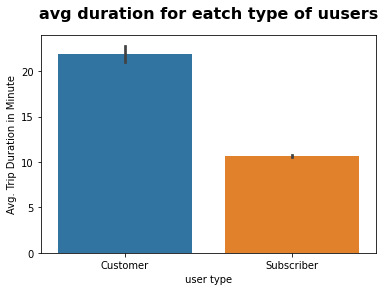

In [35]:
sb.barplot(data=df2, x='user_type', y='duration_min');
plt.title('avg duration for eatch type of users', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('user type');
plt.ylabel('Avg. Trip Duration in Minute');

Customer' bikes longer on average compared to bikers with user_type 'Subscriber'

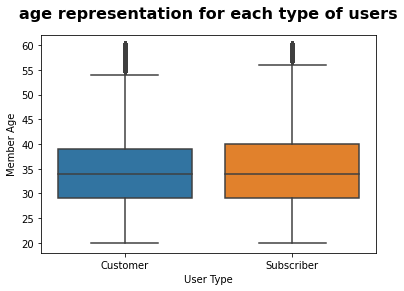

In [36]:
sb.boxplot(data=df2, x='user_type', y='member_age');
plt.title('age representation for each type of users', y=1.05, fontsize=16, fontweight='bold')

plt.xlabel('User Type');
plt.ylabel('Member Age');

subscribers are older

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Bike rides on Saturday and Sunday have longer durations compared to bike rides on other weekdays.
Bike rides start between 5:00 AM to 6:00 PM have the longest mean durations compared to other time frames.
Female bikers bike longer on average compared to male bikers.
Bikers with user_type 'Customer' bikes longer on average compared to bikers with user_type 'Subscriber'.
There are more bike rides with durations close to mean duration time (10 minutes) on the weekdays compared to the bike rides on the weekends.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>that subscribers are older

## Multivariate Exploration



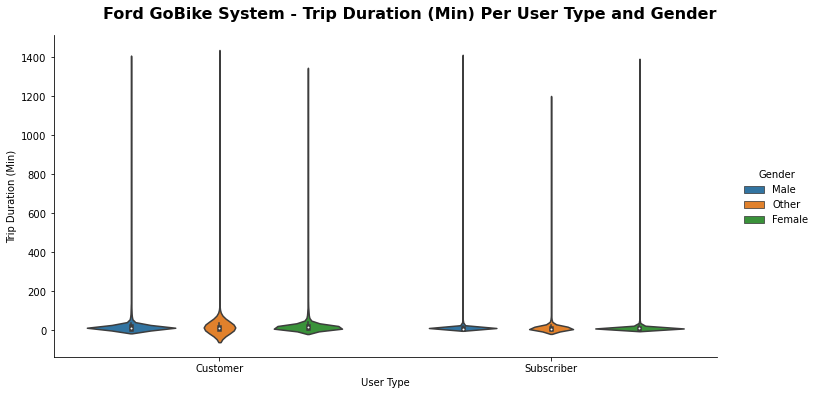

In [34]:

graph = sb.catplot(data=df2, x='user_type', y="duration_min", hue="member_gender", kind="violin", height=5, aspect=2);
graph.set_axis_labels("User Type", "Trip Duration (Min)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ford GoBike System - Trip Duration (Min) Per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

In both cases, females take longer trip than males and other genders. The difference is more visible for customers


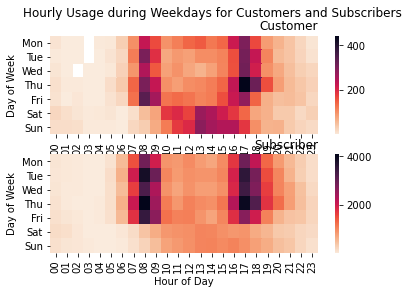

In [35]:

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df2.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_time_weekday', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
ct_counts.index = pd.CategoricalIndex(ct_counts.index, categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ct_counts.sort_index(level=0, inplace=True)
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df2.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_time_weekday', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_time_weekday', columns='start_time_hour', values='count')
st_counts.index = pd.CategoricalIndex(st_counts.index, categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
st_counts.sort_index(level=0, inplace=True)
sb.heatmap(st_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps shows  very different usage pattern between Customers and Subscribers. Subscribers use on work days  while customers on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18 on work days for subscribers when used for work commute, yet customers tend to use more in the afternoon around 17 on workdays
Tuesday, 5:00 PM has the highest biker counts across 7 days, 24 hours.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through workdays, meaning the use is primarily for commuting. while customer use shows that they uses weekends and in the afternoon, for city tour or leisure purpose probably.


### Were there any interesting or surprising interactions between features?

nothing out of the expected here. It was interesting to note the sharp monthly difference for males vs. females vs. other, and how close the female count got to the male Customer count in January through March. This may be a potential loss of possible Customers converting to Subscribers.